## Runge effect

Let us consider the Runge function $$f(x) = \frac{1}{x^2+1}$$ with $x \in \Omega=[a,b]$.

It is well known that the polynomial interpolation is **unstable** over equispaced samples, and **stable** the Chebyshev-Lobatto (CL) nodes. But what can we do if we have only equispaced samples? Are we doomed? 

Of course not! We can use the mapping 
$$S(x) = \frac{a-b}{2}\cos\left(\pi\frac{x-a}{b-a}\right)- \frac{a+b}{2}$$

so now the **fake nodes** $S(X_n)$ are Chebyshev-Lobatto points!
Let's see what happens.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.simplefilter("ignore")
from fakenodes import lebesgue, lagrange_interp, fakenodes_interp

First of all, we set $\Omega = [-5,5]$ and $N=13$ the number of samples.

In [2]:
# Choice of function to be interpolated
f = lambda x : 1./(x**2 + 1);

# Mapping
S = lambda x: -5*np.cos(np.pi*(x+5)/10)

In [3]:
N=13    # Number of nodes
x_train = np.linspace(-5,5,N);  # Equispaced samples
x_test  = np.linspace(-5,5,331); # Grid points
y_train = f(x_train)    # Function values at samples
y_true = f(x_test)  # Function values at grid points

Then we compute the CL nodes

In [4]:
# Chebyshev points and function values

def ChebyL(n):
    #compute the set of n Chebyshev-Lobatto points in [-1,1]
    return -np.cos(np.pi*np.arange(0.,n)/(n-1))

x_CL  = ChebyL(N)*5
y_CL = f(x_CL)

And the fake CL nodes. No need to compute the out values here, this is **not** resampling!.

In [5]:
# Mapping of samples and grid points with S function: 
fake_x_train = S(x_train)
fake_x_test = S(x_test)

Now we compute the interpolation in the three cases....(plus the Lebesgue functions)

In [6]:
# Interpolation 
y_poly = lagrange_interp(x_test,x_train,y_train)
y_fake = lagrange_interp(fake_x_test,fake_x_train,y_train)
y_Cheb = lagrange_interp(x_test, x_CL, y_CL)

# Relative errors
err1 = np.linalg.norm(y_true-y_poly,2)/np.linalg.norm(y_true,2)
err2 = np.linalg.norm(y_true-y_Cheb,2)/np.linalg.norm(y_true,2)
err3 = np.linalg.norm(y_true-y_fake,2)/np.linalg.norm(y_true,2)

# Lebesgue functions
lsum1 = lebesgue(x_train,x_test)
lsum2 = lebesgue(x_CL,x_test)
lsum3 = lebesgue(S(x_train),S(x_test))

...and we plot the results!

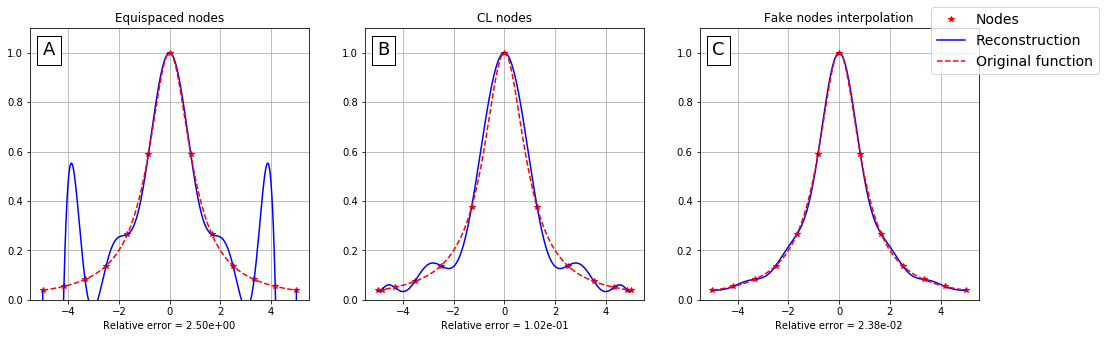

In [7]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(17,5))
ax1.cla(); ax2.cla(); ax3.cla()
ax1.plot(x_train, y_train,'r*', x_test, y_poly,'b-',x_test,y_true,'r--')
ax1.set_title("Equispaced nodes"); 
ax1.set_xlabel("Relative error = %.2e"%err1)
ax2.plot(x_CL, y_CL,'r*', x_test, y_Cheb,'b-',x_test,y_true,'r--')
ax2.set_title("CL nodes")
ax2.set_xlabel("Relative error = %.2e"%err2)
ax3.plot(x_train, y_train,'r*', x_test, y_fake,'b-',x_test,y_true,'r--')
ax3.set_title("Fake nodes interpolation")
ax3.set_xlabel("Relative error = %.2e"%err3)
ax3.legend(["Nodes","Reconstruction","Original function"],loc = (.83,.83), fontsize = 14)
bb = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(-5.,.99,"A",bbox = bb, fontsize=18)
ax2.text(-5.,.99,"B",bbox = bb, fontsize=18)
ax3.text(-5.,.99,"C",bbox = bb, fontsize=18)
ax1.set_ylim((-.1, 1.1)); ax2.set_ylim((-.1, 1.1)); ax3.set_ylim((-.1, 1.1));
ax1.set_ylim((0, 1.1)); ax2.set_ylim((0, 1.1)); ax3.set_ylim((0, 1.1));          
ax1.grid(True); ax2.grid(True); ax3.grid(True);
fig.show()
fig.savefig("runge_interp.png")

As we can see, using fake CL nodes we get a stable interpolation and we did't need to obtain new samples at different nodes! Why did this happen? To investigate we can take a look at the Lebesgue functions over the thrre set of nodes. 

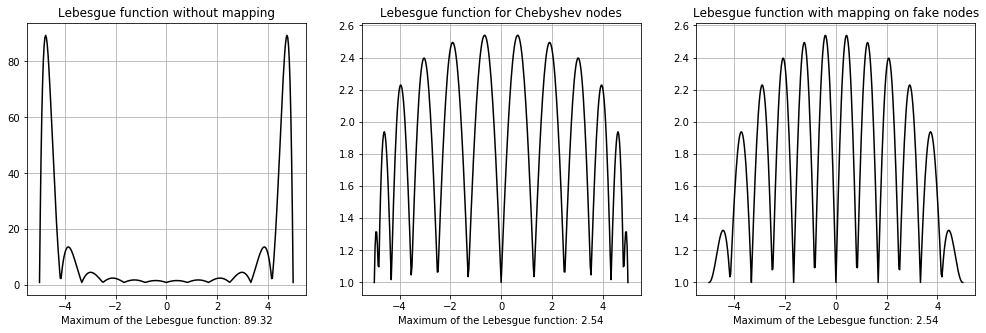

In [8]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,5))
ax1.plot(x_test,lsum1,'k-')
ax1.set_title('Lebesgue function without mapping')
ax1.grid(True)
ax1.set_xlabel("Maximum of the Lebesgue function: %.2f"%np.max(lsum1))
ax2.plot(x_test,lsum2,'k-')
ax2.set_title('Lebesgue function for Chebyshev nodes')
ax2.grid(True)
ax2.set_xlabel("Maximum of the Lebesgue function: %.2f"%np.max(lsum2))
ax3.plot(x_test,lsum3,'k-')
ax3.set_title('Lebesgue function with mapping on fake nodes')
ax3.grid(True)
ax3.set_xlabel("Maximum of the Lebesgue function: %.2f"%np.max(lsum3))
fig2.savefig("runge_lebesgue.png")

As you can onserve, while the Lebesgue function of the equispaced samples tends to explode at the sides of the domain, CL nodes have a much strictly bounded Lebesgue function. 

Using fake CL nodes, we get a bounded Lebesgue function, as in CL nodes. Yet we are using the same equispaced samples as before.